<h1>Monte Carlo Integration</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()
from scipy import integrate, interpolate

<h2>Problem 7.26</h2>
<p>$\int_{0}^{\infty} \frac{(x^2 + x)}{\sqrt{x}} \, e^{-x} \, dx$      (Eq. 7.251) </p>

Scipy Integrator:  2.215567313631897
Importance sampling estimate:  2.2097363145570976


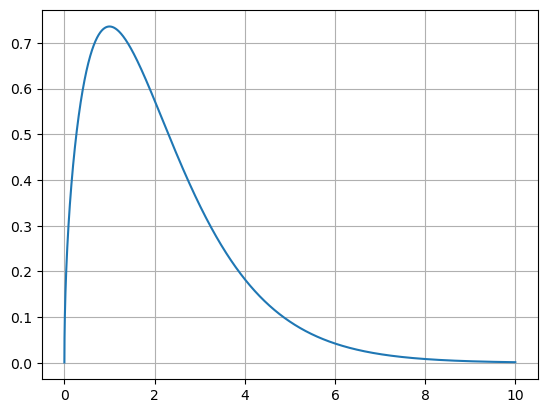

In [2]:
a = 1e-6
b = 10
N = 100_000
x = np.linspace(a, b, N)

#Built-in quadrature integrator
my_int_7251 = lambda x:( (x**2 + x)/(np.sqrt(x)))*(np.exp(-x))
quad_out_7251, err_7251 = integrate.quad(my_int_7251, 0, np.inf)
print("Scipy Integrator: ", quad_out_7251)

#Monte-Carlo
p_x = np.exp(-x)
cdf_px = np.cumsum(p_x)/np.sum(p_x)
inv_cdf = interpolate.interp1d(cdf_px, x)
draw_nums = rng.uniform(min(cdf_px), max(cdf_px), N)
exp_draws = inv_cdf(draw_nums)
vals = (exp_draws + exp_draws**2)/np.sqrt(exp_draws)
print("Importance sampling estimate: ",np.mean(vals))

#Plot
curve = ((x**2 + x)/(np.sqrt(x)))*(np.exp(-x))

fig, ax = plt.subplots()
ax.plot(x, curve)
ax.grid(True)

<h2>Problem 7.27</h2>

<p>$I_1 = \int_{0}^{2\pi} e^{\sin({2x})}dx$       </p>
<p>$I_2 = \int_{0}^{2\pi} \frac {1}{2 + \cos(x)} dx$     </p>
<p>$I_3 = \int_{-1}^{1} e^\frac{-x}{2}dx$     </p>
<p>(Eq. 7.252)</p>


I_1
Quad result:  7.9549255210118455
Rejection sampling estimate: 7.992849641835497


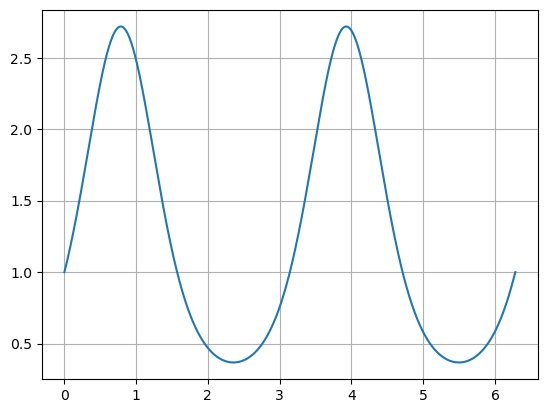

In [3]:
#I_1
print("I_1")
a = 1e-6
b = 2*np.pi
N = 100_000
x = np.linspace(a, b, N)

#Built-in quadrature integrator
my_int_726a = lambda x: np.exp(np.sin(2 * x))
quad_out_726a, err_726a = integrate.quad(my_int_726a, a, b)
print("Quad result: ", quad_out_726a)

#Monte-Carlo
x_proposal = rng.uniform(a, b, N)
u = rng.uniform(0, 1, N)
f_max = np.max(my_int_726a(x))
accepted = x_proposal[u < my_int_726a(x_proposal)/f_max]
I_mc = (2*np.pi) * f_max * len(accepted) / N
print("Rejection sampling estimate:", I_mc)

#Plot
curve = (np.exp(np.sin(2*x)))
fig, ax = plt.subplots()
ax.plot(x, curve)
ax.grid(True)

I_2
Quad result:  3.627598395135102
Rejection sampling estimate: 3.628036858337773


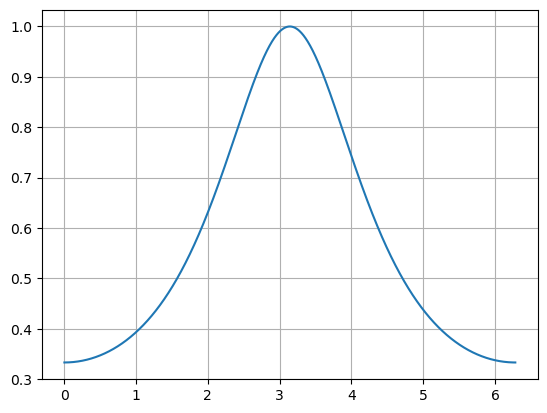

In [4]:
#I_2
print("I_2")
a = 1e-6
b = 2*np.pi
N = 100_000
x = np.linspace(a, b, N)

#Built-in quadrature integrator
my_int_726b = lambda x: (1/(2 + np.cos(x)))
quad_out_726b, err_726b = integrate.quad(my_int_726b, a, b)
print("Quad result: ", quad_out_726b)

#Monte-Carlo
x_proposal = rng.uniform(a, b, N)
u = rng.uniform(0, 1, N)
f_max = np.max(my_int_726b(x))
accepted = x_proposal[u < my_int_726b(x_proposal)/f_max]
I_mc = (2*np.pi) * f_max * len(accepted) / N
print("Rejection sampling estimate:", I_mc)

#Plot
curve = (1/(2 + np.cos(x)))
fig, ax = plt.subplots()
ax.plot(x, curve)
ax.grid(True)

I_3
Quad out:  1.7112487837842973
Rejection sampling estimate: 1.7119799999143992


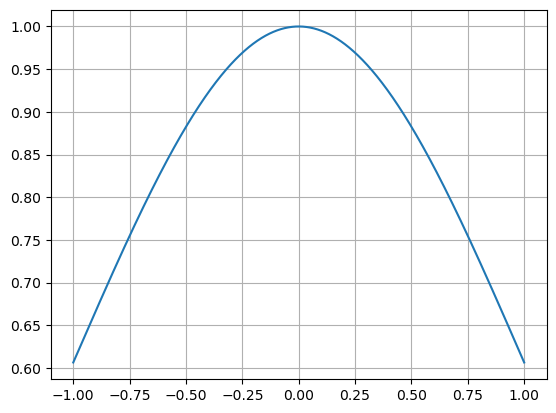

In [5]:
#I_3
print("I_3")
a = -1
b = 1
N = 100_000
x = np.linspace(a, b, N)


#Built-in quadrature integrator
my_int_726c = lambda x:(np.exp(-(x**2)/2))
quad_out_726c, err_726c = integrate.quad(my_int_726c, a, b)
print("Quad out: ", quad_out_726c)


#Monte-Carlo
x_proposal = rng.uniform(a, b, N)
u = rng.uniform(0, 1, N)
f_max = np.max(my_int_726c(x))
accepted = x_proposal[u < my_int_726c(x_proposal)/f_max]
I_mc = 2 * f_max * len(accepted) / N
print("Rejection sampling estimate:", I_mc)


#Plot
curve = (np.exp(-(x**2)/2))
fig, ax = plt.subplots()
ax.plot(x, curve)
ax.grid(True)

<h2>Problem 7.28</h2>
<p>$I_1 = \int_{0}^{\pi}\sqrt{x}\cos{x} dx$      (Eq. 7.253) </p>

Scipy Integrator:  -0.8948314695903177
Rejection sampling estimate: -0.8931026258770666


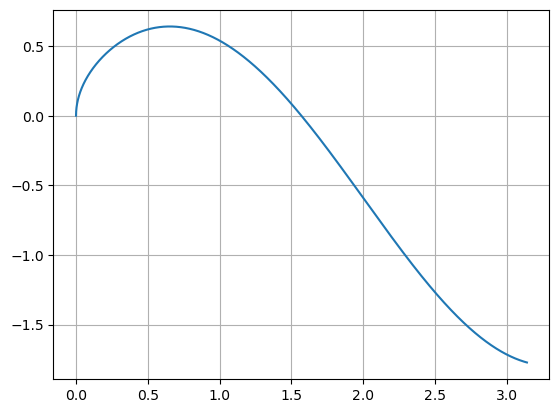

In [6]:
a = 1e-6
b = np.pi
N = 100_000
x = np.linspace(a, b, N)


#Built-in quadrature integrator
my_int_7253 = lambda x: (np.sqrt(x)*np.cos(x))
quad_out_7253, err_7253 = integrate.quad(my_int_7253, a, b)
print("Scipy Integrator: ", quad_out_7253)


# #Monte-Carlo
x_proposal = rng.uniform(a, b, N)
u = rng.uniform(0, 1, N)
f_vals = my_int_7253(x_proposal)
f_max_pos = np.max(f_vals)
f_max_neg = np.max(-np.minimum(f_vals,0))
# Positive part
accepted_pos = x_proposal[(f_vals > 0) & (u < f_vals/f_max_pos)]
I_pos = np.pi * f_max_pos * len(accepted_pos)/N
# Negative part
accepted_neg = x_proposal[(f_vals < 0) & (u < -f_vals/f_max_neg)]
I_neg = np.pi * f_max_neg * len(accepted_neg)/N
I_mc = I_pos - I_neg
print("Rejection sampling estimate:", I_mc)


#Plot
curve = (np.sqrt(x)*np.cos(x))
fig, ax = plt.subplots()
ax.plot(x, curve)
ax.grid(True)